In [31]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#212946',
    'axes.facecolor': '#212946',
    'savefig.facecolor':'#212946',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': '#2A3459',
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12 }
plt.rcParams.update(dark_style)

from pylab import rcParams
rcParams['figure.figsize'] = (18,7)


In [32]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/Naren8520/Serie-de-tiempo-con-Machine-Learning/main/Data/Esperanza_vida.csv", usecols=[1,2])
df.head()


year      value
0  1960-01-01  69.123902
1  1961-01-01  69.760244
2  1962-01-01  69.149756
3  1963-01-01  69.248049
4  1964-01-01  70.311707

In [33]:
df["unique_id"]="1"
df.columns=["ds", "y", "unique_id"]
df.head()


ds          y unique_id
0  1960-01-01  69.123902         1
1  1961-01-01  69.760244         1
2  1962-01-01  69.149756         1
3  1963-01-01  69.248049         1
4  1964-01-01  70.311707         1

In [34]:
print(df.dtypes)

ds            object
y            float64
unique_id     object
dtype: object


In [ ]:
df["ds"] = pd.to_datetime(df["ds"])

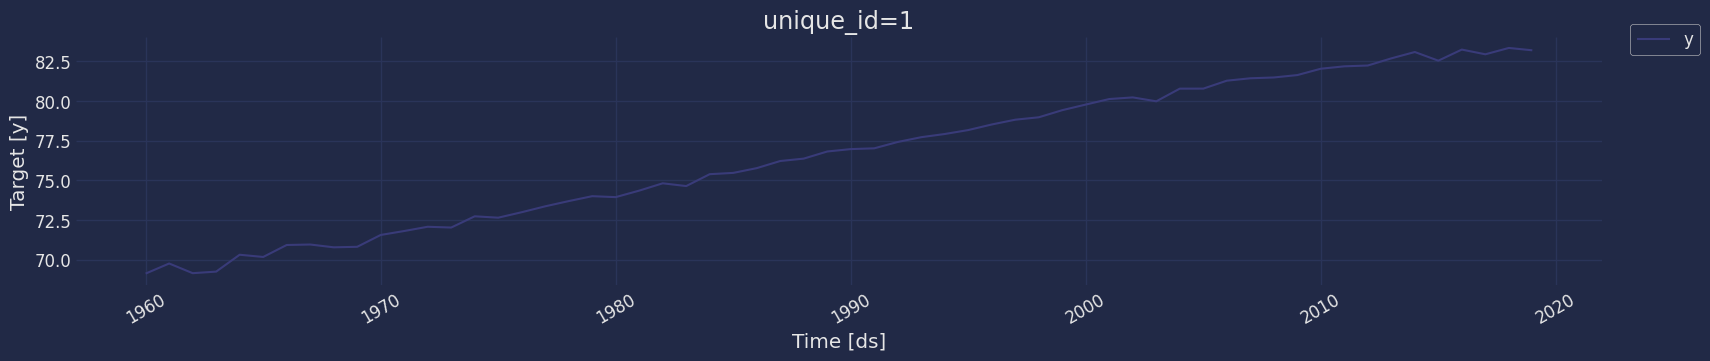

In [ ]:
from statsforecast import StatsForecast

StatsForecast.plot(df)

count    60.000000
mean     76.632439
std       4.495279
min      69.123902
25%      72.712622
50%      76.895122
75%      80.781098
max      83.346341
Name: y, dtype: float64

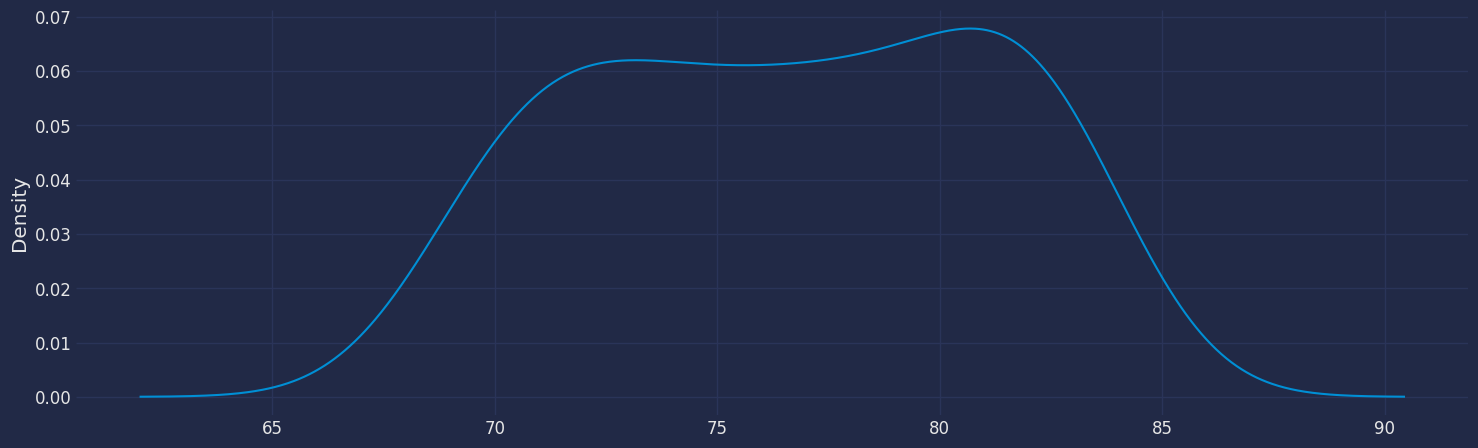

In [37]:
df["y"].plot(kind='kde',figsize = (16,5))
df["y"].describe()


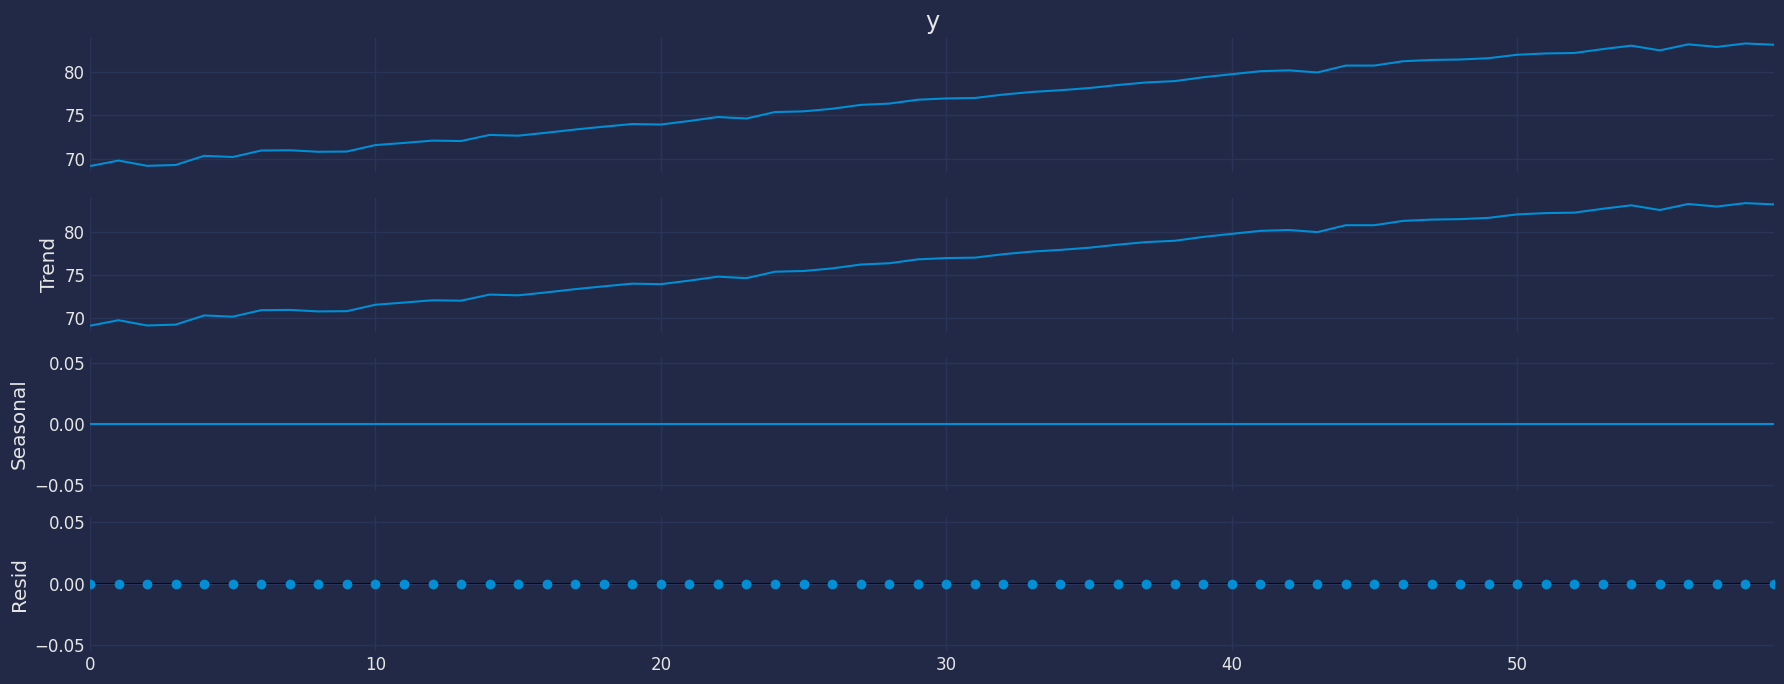

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed=seasonal_decompose(df["y"], model = "add", period=1)
decomposed.plot()
plt.show()


In [40]:
from statsmodels.tsa.stattools import adfuller

def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Dickey-Fuller test results for columns: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("The data is stationary")
    else:
        print("Conclusion:====>")
        print("The null hypothesis cannot be rejected")
        print("The data is not stationary")


In [41]:
Augmented_Dickey_Fuller_Test_func(df["y"],"Life expectancy")


Dickey-Fuller test results for columns: Life expectancy
Test Statistic                 -1.578590
p-value                         0.494339
No Lags Used                    2.000000
Number of observations used    57.000000
Critical Value (1%)            -3.550670
Critical Value (5%)            -2.913766
Critical Value (10%)           -2.594624
dtype: float64
Conclusion:====>
The null hypothesis cannot be rejected
The data is not stationary


In [42]:
df1=df.copy()
df1['y_diff'] = df['y'].diff()
df1.dropna(inplace=True)
df1.head()


ds          y unique_id    y_diff
1 1961-01-01  69.760244         1  0.636341
2 1962-01-01  69.149756         1 -0.610488
3 1963-01-01  69.248049         1  0.098293
4 1964-01-01  70.311707         1  1.063659
5 1965-01-01  70.171707         1 -0.140000

In [43]:
Augmented_Dickey_Fuller_Test_func(df1["y_diff"],"Life expectancy")


Dickey-Fuller test results for columns: Life expectancy
Test Statistic                -8.510100e+00
p-value                        1.173776e-13
No Lags Used                   1.000000e+00
Number of observations used    5.700000e+01
Critical Value (1%)           -3.550670e+00
Critical Value (5%)           -2.913766e+00
Critical Value (10%)          -2.594624e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
The data is stationary


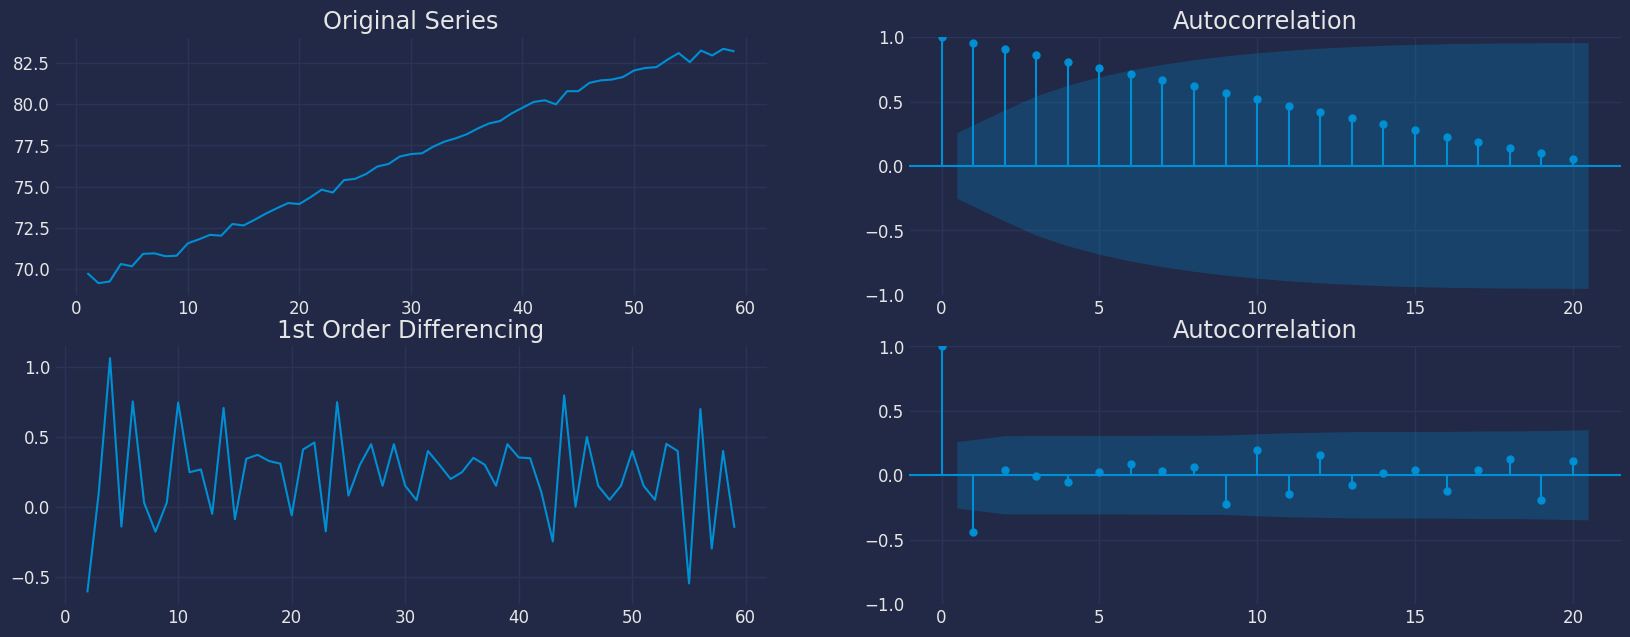

In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


fig, axes = plt.subplots(2, 2, )
axes[0, 0].plot(df1["y"]); axes[0, 0].set_title('Original Series')
plot_acf(df1["y"], ax=axes[0, 1],lags=20)

axes[1, 0].plot(df1["y"].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df1["y"].diff().dropna(), ax=axes[1, 1],lags=20)


plt.show()


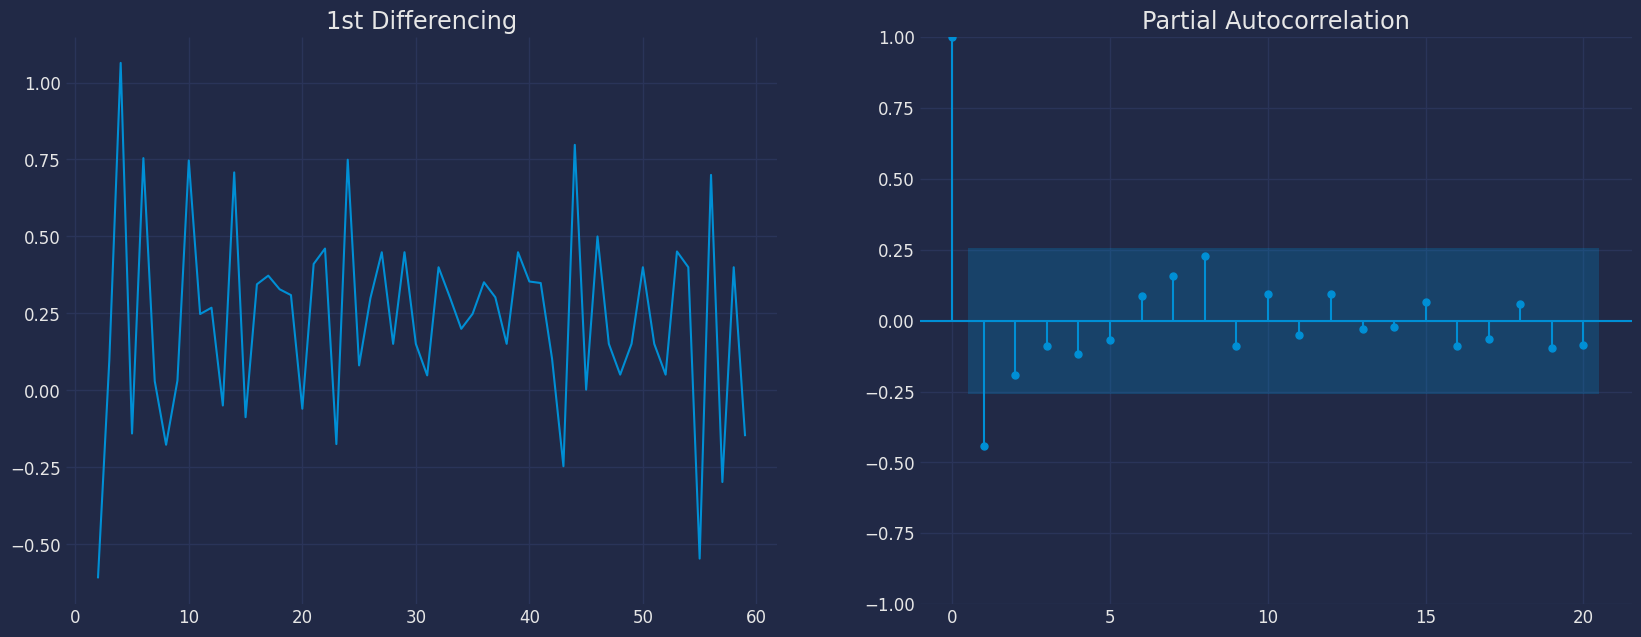

In [45]:
fig, axes = plt.subplots(1, 2)
axes[0].plot(df1["y"].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df1["y"].diff().dropna(), ax=axes[1],lags=20)

plt.show()


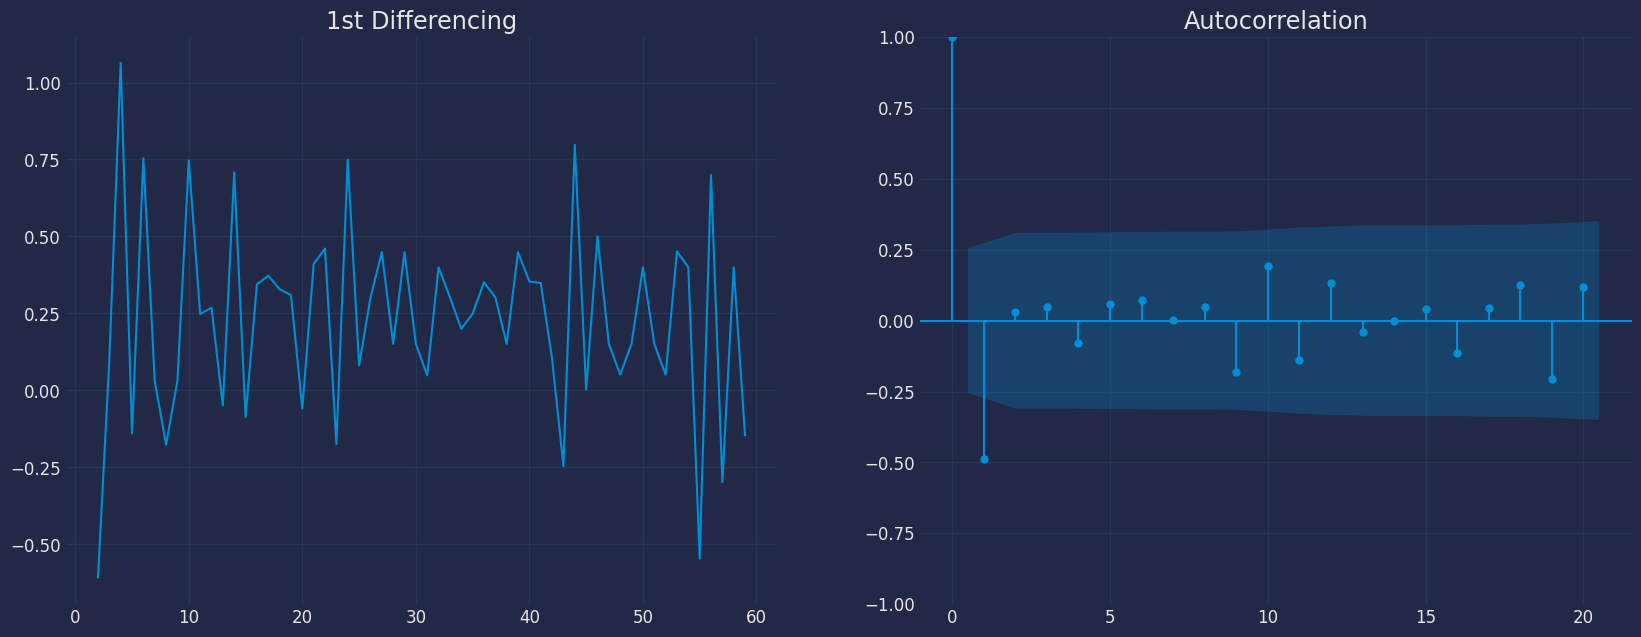

In [46]:
from statsmodels.graphics.tsaplots import plot_acf

fig, axes = plt.subplots(1, 2)
axes[0].plot(df1["y"].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df["y"].diff().dropna(), ax=axes[1], lags=20)

plt.show()


In [47]:
from statsforecast.models import ARIMA


In [48]:
arima = ARIMA(order=(1, 1, 1), season_length=1)


In [49]:
arima = arima.fit(y=df["y"].values)


In [50]:
y_hat_dict = arima.predict(h=6,)
y_hat_dict


{'mean': array([83.20690258, 83.20350815, 83.20474157, 83.20429339, 83.20445624,
        83.20439707])}

In [51]:
y_hat_dict2 = arima.predict(h=6,level=[95])
y_hat_dict2


{'mean': array([83.20690258, 83.20350815, 83.20474157, 83.20429339, 83.20445624,
        83.20439707]),
 'lo-95': 0    82.412336
 1    82.094625
 2    81.848344
 3    81.640430
 4    81.457145
 5    81.291297
 Name: 95%, dtype: float64,
 'hi-95': 0    84.001469
 1    84.312391
 2    84.561139
 3    84.768156
 4    84.951767
 5    85.117497
 Name: 95%, dtype: float64}

In [52]:
Y_hat_df=arima.forecast(y=df["y"].values, h=6, fitted=True)
Y_hat_df


{'mean': array([83.20690258, 83.20350815, 83.20474157, 83.20429339, 83.20445624,
        83.20439707]),
 'fitted': array([69.05477857, 69.12415837, 69.74316368, 69.17171313, 69.23804589,
        70.28686129, 70.1837902 , 70.90201618, 70.96388823, 70.7822243 ,
        70.81035443, 71.53950755, 71.80674131, 72.06827213, 72.03003137,
        72.71436524, 72.65637207, 72.97975917, 73.35885493, 73.68640246,
        73.99675247, 73.94674701, 74.34180251, 74.80648828, 74.64761374,
        75.36715423, 75.47610831, 75.76096268, 76.2108982 , 76.36962192,
        76.80798142, 76.97060441, 77.01826109, 77.409323  , 77.71736069,
        77.91819219, 78.16539862, 78.51443098, 78.8189007 , 78.97344753,
        79.41321397, 79.77243207, 80.11946926, 80.22903009, 79.98954166,
        80.75710312, 80.79073905, 81.26703208, 81.43548901, 81.48355491,
        81.63318403, 82.02712045, 82.18698172, 82.23794299, 82.67863887,
        83.08354233, 82.56065236, 83.21969179, 82.96238987, 83.33032508])}

In [53]:
forecast=pd.Series(pd.date_range("2014-01-01", freq="ys", periods=6))
forecast=pd.DataFrame(forecast)
forecast.columns=["ds"]
forecast


C:\Users\esteb\AppData\Local\Temp\ipykernel_13472\2814400862.py:1: FutureWarning: 'ys' is deprecated and will be removed in a future version, please use 'YS' instead.
  forecast=pd.Series(pd.date_range("2014-01-01", freq="ys", periods=6))


ds
0 2014-01-01
1 2015-01-01
2 2016-01-01
3 2017-01-01
4 2018-01-01
5 2019-01-01

In [54]:
df=df.set_index("ds")


In [55]:
forecast["unique_id"]="1"
forecast["hat"]=y_hat_dict.get("mean")
forecast["lo-95"]=y_hat_dict2.get("lo-95")
forecast["hi-95"]=y_hat_dict2.get("hi-95")
forecast=forecast.set_index("ds")
forecast


unique_id        hat      lo-95      hi-95
ds                                                   
2014-01-01         1  83.206903  82.412336  84.001469
2015-01-01         1  83.203508  82.094625  84.312391
2016-01-01         1  83.204742  81.848344  84.561139
2017-01-01         1  83.204293  81.640430  84.768156
2018-01-01         1  83.204456  81.457145  84.951767
2019-01-01         1  83.204397  81.291297  85.117497

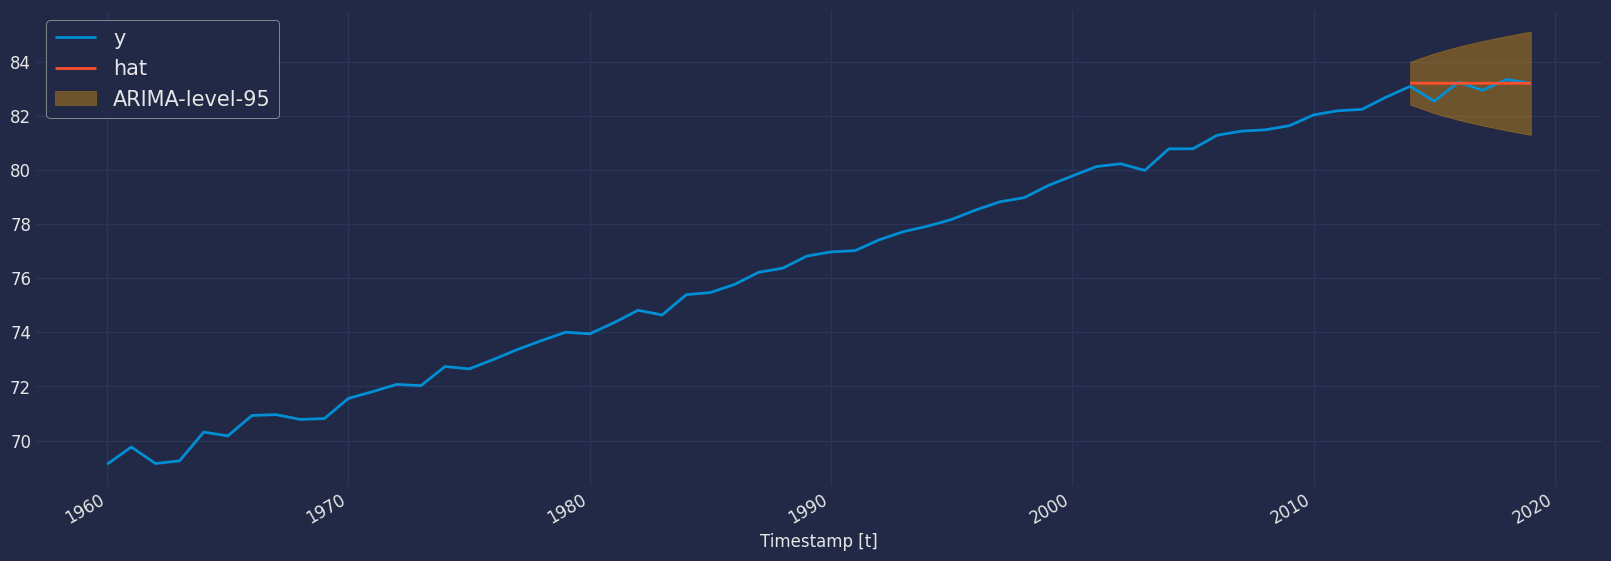

In [56]:
_, ax = plt.subplots(1, 1)
df_plot = pd.concat([df, forecast])
df_plot[['y', 'hat']].plot(ax=ax, linewidth=2)
ax.fill_between(df_plot.index, 
                df_plot['lo-95'], 
                df_plot['hi-95'],
                alpha=.35,
                color='orange',
                label='ARIMA-level-95')
ax.set_title('', fontsize=22)
ax.set_ylabel('', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=12)
ax.legend(prop={'size': 15})
ax.grid(True)


In [57]:
df.reset_index("ds", inplace=True)
Y_train_df = df[df.ds<='2013-01-01'] 
Y_test_df = df[df.ds>'2013-01-01'] 

Y_train_df.shape, Y_test_df.shape


((54, 3), (6, 3))

In [58]:
from sklearn import metrics

def model_evaluation(y_true, y_pred, Model):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print (f'Model Evaluation: {Model}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}')
    print(f'corr is : {np.corrcoef(y_true, y_pred)[0,1]}',end='\n\n')


In [59]:
model_evaluation(Y_test_df["y"], forecast["hat"], "Arima")


Model Evaluation: Arima
MSE is : 0.08948997525804449
MAE is : 0.20368308088119136
RMSE is : 0.29914875105546485
MAPE is : 0.24599653509055822
R2 is : -0.2941030399745983
corr is : 0.37739861307370176

